In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC
import random

In [15]:
innerList = []
outerList = []
for x in range(0,50):
    innerList = []
    innerList.append([165+random.randint(0,10)])
    outerList.append(innerList[0])
    
innerList2 = []
outerList2 = []
for x in range(0,50):
    innerList2 = []
    innerList2.append([150+random.randint(0,5)])
    outerList2.append(innerList2[0])
    
print(outerList)
print(outerList2)

mylist = outerList+outerList2

[[168], [173], [175], [171], [172], [166], [165], [170], [175], [167], [174], [166], [173], [172], [165], [171], [174], [172], [172], [175], [167], [170], [174], [166], [168], [171], [167], [175], [174], [172], [166], [173], [173], [168], [175], [165], [167], [171], [168], [173], [170], [172], [170], [169], [169], [174], [165], [167], [172], [170]]
[[150], [153], [150], [151], [153], [150], [150], [154], [152], [152], [150], [153], [153], [154], [153], [152], [153], [153], [154], [154], [153], [155], [152], [153], [151], [150], [153], [150], [151], [154], [153], [155], [151], [153], [150], [154], [151], [155], [152], [150], [150], [155], [150], [155], [155], [151], [153], [155], [154], [153]]


In [16]:
df = pd.DataFrame(data=mylist,columns=["Height"])

In [17]:
df.head()

,Height
0,168
1,173
2,175
3,171
4,172


In [24]:
innerList = []
outerList = []
for x in range(0,50):
    innerList = []
    innerList.append(1)
    outerList.append(innerList[0])
    
innerList2 = []
outerList2 = []
for x in range(0,50):
    innerList2 = []
    innerList2.append(0)
    outerList2.append(innerList2[0])
    
print(outerList)
print(outerList2)

mylist = outerList+outerList2

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [25]:
df["GF"]=pd.Series(mylist)

In [28]:
df.head()

,Height,GF
0,168,1
1,173,1
2,175,1
3,171,1
4,172,1


In [59]:
innerList = []
outerList = []
for x in range(0,50):
    innerList = []
    innerList.append(random.randint(110,135))
    outerList.append(innerList[0])
    
innerList2 = []
outerList2 = []
for x in range(0,50):
    innerList2 = []
    innerList2.append(random.randint(85,100))
    outerList2.append(innerList2[0])
    
print(outerList)
print(outerList2)

mylist = outerList+outerList2

df["IQ"]=pd.Series(mylist)

[119, 132, 127, 123, 124, 117, 119, 130, 134, 127, 131, 118, 120, 132, 124, 120, 124, 127, 135, 133, 128, 111, 126, 121, 131, 115, 118, 122, 126, 131, 116, 127, 123, 134, 118, 114, 127, 127, 124, 125, 130, 118, 115, 123, 125, 119, 111, 116, 115, 131]
[98, 96, 90, 92, 87, 85, 91, 85, 94, 92, 99, 97, 96, 88, 85, 99, 86, 89, 89, 92, 96, 99, 92, 98, 87, 86, 94, 96, 93, 87, 99, 91, 85, 97, 93, 95, 92, 100, 85, 97, 97, 97, 91, 89, 92, 88, 99, 89, 91, 91]


In [62]:
df.head()

,Height,GF,JJ,IQ
0,168,1,13,119
1,173,1,13,132
2,175,1,13,127
3,171,1,14,123
4,172,1,15,124


In [72]:
model = SVC()

In [73]:
X = df[["Height","IQ"]]
y = df["GF"]

In [74]:
model.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
# Predicting the Test set results
y_pred = model.predict(X)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)

In [76]:
cm

array([[50,  0],
       [ 0, 50]], dtype=int64)

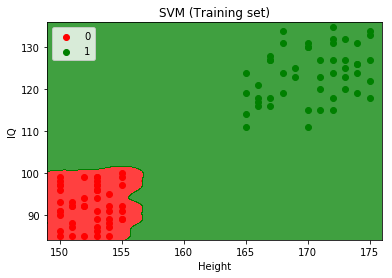

In [77]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X, y
X1, X2 = np.meshgrid(np.arange(start = X_set.values[:, 0].min() - 1, stop = X_set.values[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set.values[:, 1].min() - 1, stop = X_set.values[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set.values[y_set == j, 0], X_set.values[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Height')
plt.ylabel('IQ')
plt.legend()
plt.show()
